In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('Test.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [4]:
df[df==0].count()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              353
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [5]:
df['Item_Weight'].replace(np.nan, df['Item_Weight'].mean(axis=0), inplace=True)

In [6]:
df['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [7]:
df['Outlet_Size'].replace(np.nan,'Medium', inplace=True)

In [8]:
df['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [9]:
df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat', inplace=True)
df['Item_Fat_Content'].replace('reg','Regular', inplace=True)

In [10]:
df['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [11]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0, df['Item_Visibility'].mean())

In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [13]:
df[df==0].count()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [14]:
columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
encoder = [LabelEncoder() for i in range(7)]
for i in range(7):
    encoder[i].fit(df[columns[i]])
    df[columns[i]] = encoder[i].transform(df[columns[i]])   

In [15]:
def Outlier_list(column):
    li = list(df[column][np.abs(stats.zscore(df[column])) > 3].index)
    return li
def Scatter(column):
    plt.figure(figsize=[4,4])
    plt.scatter(df[column].index, df[column])
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

Outliers in Item_Identifier are: []


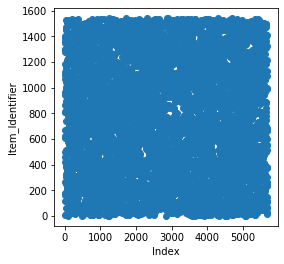

In [16]:
li = Outlier_list(column='Item_Identifier')
print('Outliers in Item_Identifier are:', li)
Scatter(column='Item_Identifier')

Outliers in Item_Weight are: []


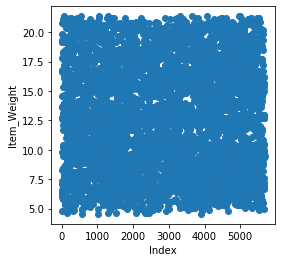

In [17]:
li = Outlier_list(column='Item_Weight')
print('Outliers in Item_Weight are:', li)
Scatter(column='Item_Weight')

Outliers in Item_Fat_Content are: []


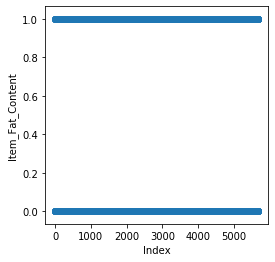

In [18]:
li = Outlier_list(column='Item_Fat_Content')
print('Outliers in Item_Fat_Content are:', li)
Scatter(column='Item_Fat_Content')

Outliers in Item_Visibility are: [46, 76, 78, 89, 138, 242, 333, 385, 474, 543, 637, 858, 871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616, 1710, 1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380, 2393, 2504, 2516, 2561, 2605, 2609, 2625, 2628, 2652, 2677, 2721, 2779, 2836, 2837, 2843, 3231, 3267, 3294, 3313, 3316, 3346, 3378, 3502, 3638, 3679, 3970, 4052, 4147, 4159, 4208, 4255, 4328, 4365, 4421, 4575, 4616, 4689, 4801, 4804, 4846, 4919, 4976, 4999, 5121, 5157, 5277, 5290, 5435, 5469, 5482, 5514, 5571, 5668]
Size: 86


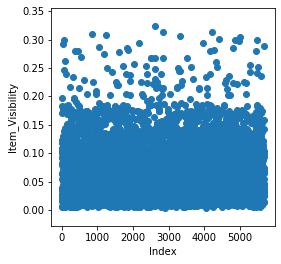

In [19]:
li = Outlier_list(column='Item_Visibility')
print('Outliers in Item_Visibility are:', li)
print('Size:',len(li))
Scatter(column='Item_Visibility')

In [20]:
pd.options.mode.chained_assignment = None
ls = list(df['Item_Visibility'][df['Item_Visibility']>0.20].index)
df['Item_Visibility'][ls] = 0.20

Outliers in Item_Visibility are: []
Size: 0


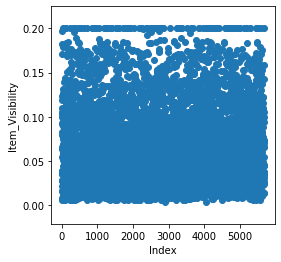

In [21]:
li = Outlier_list(column='Item_Visibility')
print('Outliers in Item_Visibility are:', li)
print('Size:',len(li))
Scatter(column='Item_Visibility')

Outliers in Item_Type are: []


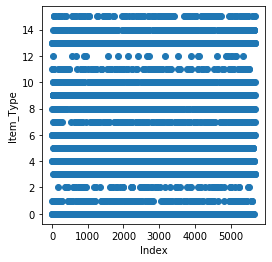

In [22]:
li = Outlier_list(column='Item_Type')
print('Outliers in Item_Type are:', li)
Scatter(column='Item_Type')

Outliers in Item_MRP are: []


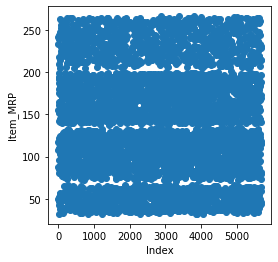

In [23]:
li = Outlier_list(column='Item_MRP')
print('Outliers in Item_MRP are:', li)
Scatter(column='Item_MRP')

Outliers in Outlet_Identifier are: []


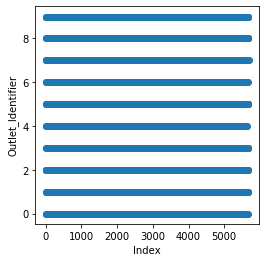

In [24]:
li = Outlier_list(column='Outlet_Identifier')
print('Outliers in Outlet_Identifier are:', li)
Scatter(column='Outlet_Identifier')

Outliers in Outlet_Establishment_Year are: []


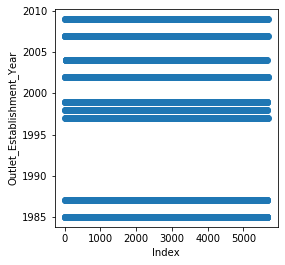

In [25]:
li = Outlier_list(column='Outlet_Establishment_Year')
print('Outliers in Outlet_Establishment_Year are:', li)
Scatter(column='Outlet_Establishment_Year')

Outliers in Outlet_Size are: []


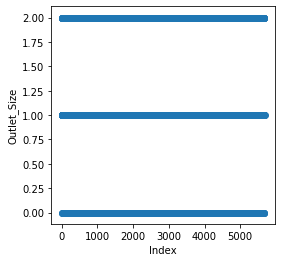

In [26]:
li = Outlier_list(column='Outlet_Size')
print('Outliers in Outlet_Size are:', li)
Scatter(column='Outlet_Size')

Outliers in Outlet_Location_Type are: []


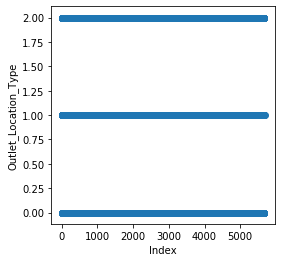

In [27]:
li = Outlier_list(column='Outlet_Location_Type')
print('Outliers in Outlet_Location_Type are:', li)
Scatter(column='Outlet_Location_Type')

Outliers in Outlet_Type are: []


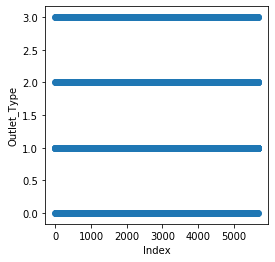

In [28]:
li = Outlier_list(column='Outlet_Type')
print('Outliers in Outlet_Type are:', li)
Scatter(column='Outlet_Type')

In [29]:
#Inverse on Labelled Data
for i in range(7):
    df[columns[i]] = encoder[i].inverse_transform(df[columns[i]])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [30]:
df.to_csv('Cleaned_Test_Dataset.csv', index=False)